# Model-Free Prediction and Control
### This Jupyter Notebook is created for visualization purposes

#### Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Courier New"
import copy

from maze_class import Maze
from monte_carlo import * # Literally everything is imported from there, useless to point out every variable and function 
from td_learning import * # Same goes for td_learning
from plot_functions import plot_grid, q_table, plot_q_table


import sys
sys.path.append('/Users/wolfsinem/as/week1/')

from value_iteration import *

## Monte Carlo

#### Initialise parameters

In [4]:
MAX_EP = 3000
STEP_COST = -0.1
MAX_EP_LEN = 30

maze_coords = {
    "[0, 0]": 0, "[0, 1]": 1, "[0, 2]": 2, "[0, 3]": 3,
    "[1, 0]": 4, "[1, 1]": 5, "[1, 2]": 6, "[1, 3]": 7,
    "[2, 0]": 8, "[2, 1]": 9, "[2, 2]": 10, "[2, 3]": 11,
    "[3, 0]": 12, "[3, 1]": 13, "[3, 2]": 14, "[3, 3]": 15
}

reversed_maze = {
    "0": [0, 0], "1": [0, 1], "2": [0, 2], "3": [0, 3],
    "4": [1, 0], "5": [1, 1], "6": [1, 2], "7": [1, 3],
    "8": [2, 0], "9": [2, 1], "10": [2, 2], "11": [2, 3],
    "12": [3, 0], "13": [3, 1], "14": [3, 2], "15": [3, 3],
}

#### Evironment

In [5]:
env = Maze(maze_coords,reversed_maze, step_cost=STEP_COST, max_ep_length=MAX_EP_LEN)

#### Visualize rewards

#### Factor 1

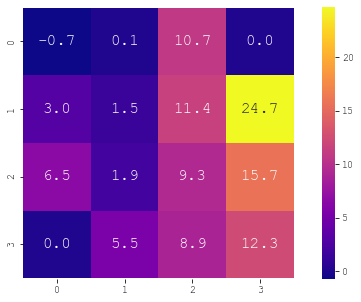

In [6]:
mc_1 = mc_evaluation_policy(env, discount_factor=1)
plot_grid(mc_1.reshape((4,4)))

In [7]:
policy = optimal_policy(mc_1.reshape(4,4))
maze_grid(policy, True)

| ↓     | →     | ↓     | F     |
| ↓     | →     | →     | →     |
| ←     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



#### Factor 0.9

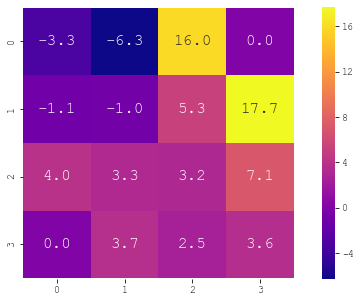

In [8]:
mc_2 = mc_evaluation_policy(env, discount_factor=0.9)
plot_grid(mc_2.reshape((4,4)))

In [9]:
policy = optimal_policy(mc_2.reshape(4,4))
maze_grid(policy, True)

| ↓     | →     | ↑     | F     |
| ↓     | →     | →     | →     |
| ←     | ↓     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



## TD Learning

#### Factor 1

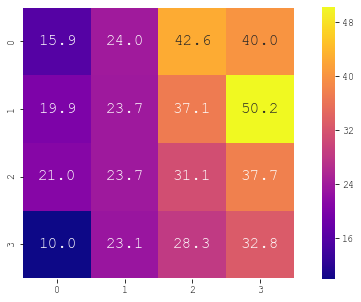

In [10]:
td_1 = td_learning(env, discount_factor=1)
plot_grid(td_1.reshape((4,4)))

In [11]:
policy = optimal_policy(td_1.reshape(4,4))
maze_grid(policy, True)

| →     | →     | ↑     | F     |
| →     | →     | →     | →     |
| →     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



#### Factor 0.9

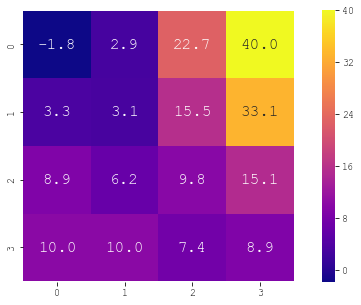

In [12]:
td_2 = td_learning(env, discount_factor=0.9)
plot_grid(td_2.reshape((4,4)))

In [13]:
policy = optimal_policy(td_2.reshape(4,4))
maze_grid(policy, True)

| ↓     | →     | →     | F     |
| ↓     | →     | →     | ↑     |
| ↓     | ↓     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



## On-policy first-visit Monte-Carlo Control

In [26]:
def return_max_rewards(lst):
    """This function returns a miltidimensional array out of the results in the grid.
    It takes the max value. 
    """
    rewards = []
    for i in range(16):
        rewards.append(max(lst[i]))

    rewards = np.array(rewards).reshape(4, 4)
    return rewards

#### Initialize returns lists 

In [22]:
returns = returns_lists(cells=16, actions=4)

#### Visualize Q-Table

#### Factor 1

In [23]:
# Factor 1
grid_values = first_visit_mc(env=env, max_ep=MAX_EP, discount_factor=1, returns=returns)
print(grid_values)

[[-1.00000000e-01 -1.13250000e+01  1.80000000e+01  0.00000000e+00]
 [-1.67000000e+01 -4.06500000e+01 -1.10900000e+02  2.97500000e+00]
 [-4.25000000e-01  4.00000000e+01  3.95333333e+01 -9.72000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.13333333e+00 -1.73500000e+01  2.01894737e+01 -1.80000000e+00]
 [-8.10000000e+01 -5.60000000e+00  8.00000000e+00  1.84888889e+01]
 [ 2.67421053e+01  3.98622857e+01  3.93875000e+01  1.31666667e+01]
 [ 4.00000000e+01  3.98608939e+01  3.96692308e+01  3.76615854e+01]
 [ 4.30000000e+00  2.20800000e+01  1.00000000e+01  8.70000000e+00]
 [ 2.16666667e-01  8.30000000e+00  3.21772727e+01  1.89130435e+01]
 [ 3.21384615e+01  3.91439153e+01  3.57620690e+01  2.53931034e+01]
 [ 3.97374741e+01  3.89614943e+01  3.93486911e+01  3.78270718e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.30076923e+01  3.81294118e+01  2.98384615e+01  1.00000000e+01]
 [ 3.80843434e+01  3.92585767e+01  3.79175879e+01  3.34040698e

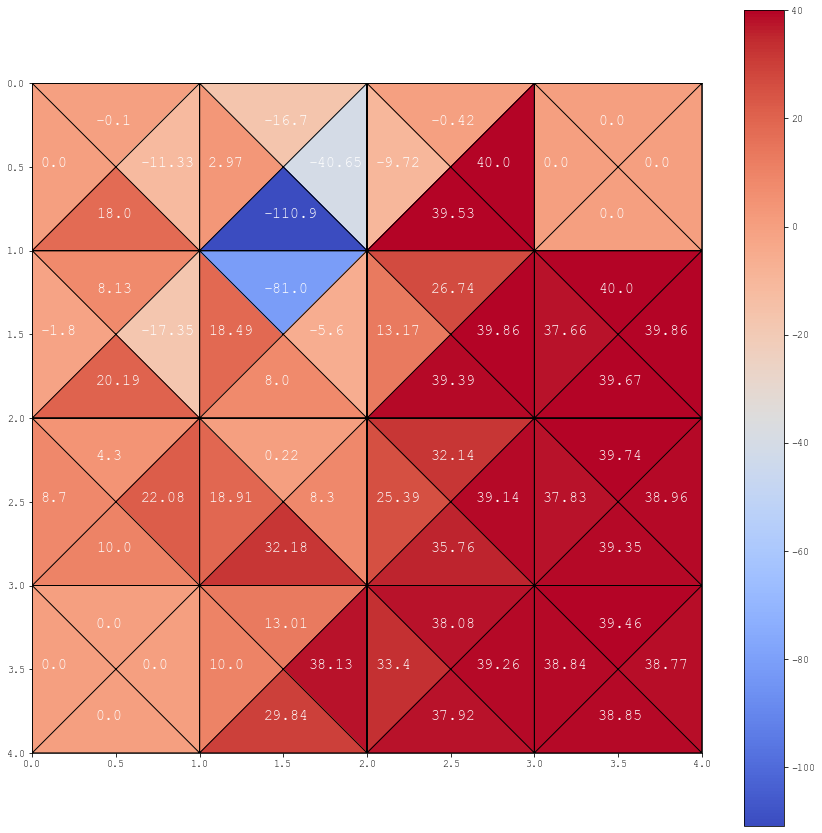

In [24]:
plot_q_table(grid_values)

In [27]:
policy = optimal_policy(return_max_rewards(grid_values))
maze_grid(policy, True)

| ←     | →     | ↑     | F     |
| ↓     | →     | →     | ↓     |
| →     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



#### Factor 0.99

In [28]:
# Factor 0.9
grid_values_2 = first_visit_mc(env=env, max_ep=MAX_EP, discount_factor=0.9, returns=returns)
print(grid_values_2)

[[  4.66082495 -11.325       15.98723032   0.        ]
 [-13.78450115 -40.65       -43.844955     4.55129931]
 [ 15.14285714  40.          39.53333333  -8.13819219]
 [  0.           0.           0.           0.        ]
 [ 10.09577303  -2.61067638  17.6376469    3.82884   ]
 [-42.06726803  -5.6          8.          14.88281018]
 [ 30.45676471  36.90550568  31.57956586  10.2072858 ]
 [ 40.          37.23269282  35.18952195  32.98777621]
 [  6.54895401  19.44542109  10.           8.7       ]
 [  4.41577698  18.5945      21.57799118  18.69340914]
 [ 30.31044222  34.47682142  29.82520985  20.45916624]
 [ 37.08615747  34.11312643  32.77219185  32.19746915]
 [  0.           0.           0.           0.        ]
 [ 13.44828951  30.2629095   21.79632038  10.        ]
 [ 31.56834625  32.52627647  30.5281767   24.83767845]
 [ 34.5657622   32.79244486  32.07043115  30.67240572]]


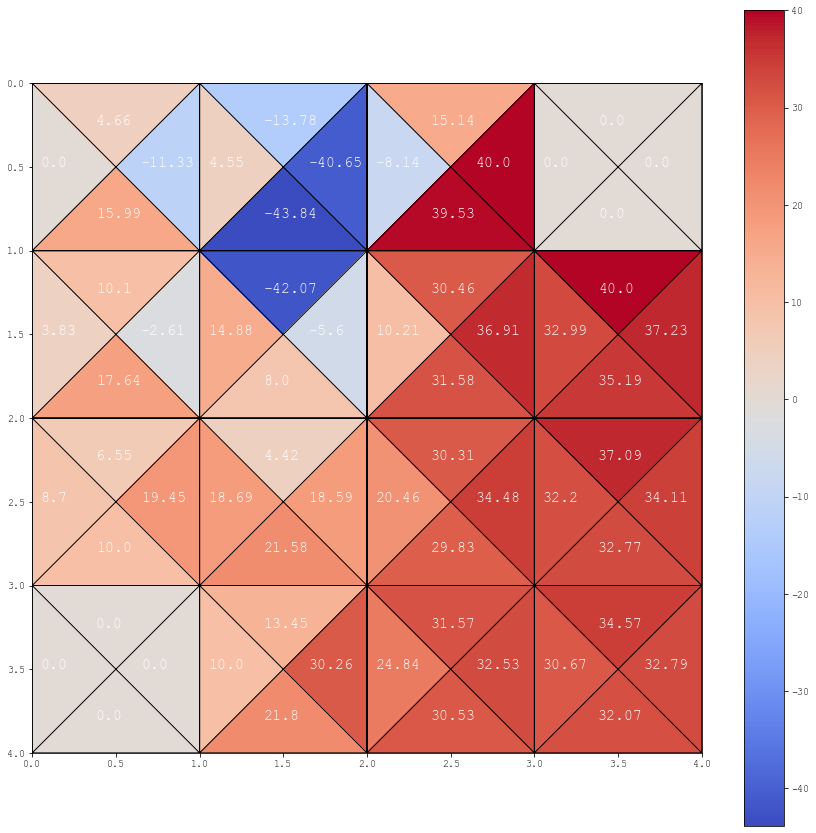

In [29]:
plot_q_table(grid_values_2)

In [30]:
policy = optimal_policy(return_max_rewards(grid_values_2))
maze_grid(policy, True)

| ←     | →     | ↑     | F     |
| ↓     | →     | →     | ↓     |
| →     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



## SARSA

#### Visualize maze rewards

#### Factor 1 

[[ 0.49130856  0.21078929  6.36920666  1.05049534]
 [ 1.98038327 37.31218961 12.45781819  1.18418879]
 [33.68093313 79.81331375 31.88597612  2.38816866]
 [40.         40.         40.         40.        ]
 [ 1.25840207 12.50041079 12.59545993  6.01875789]
 [ 3.01519813 36.12419451 14.76552334  6.16788401]
 [41.73503963 56.75531509 28.55061541 15.11246243]
 [79.99999499 55.54048958 39.31409467 35.80043365]
 [ 6.94216541 14.51487596 19.99046297 11.1659873 ]
 [16.22297871 28.98117392 16.19364364 12.7443088 ]
 [36.55497571 38.91573372 25.63566161 17.51339563]
 [55.86200564 37.6173082  31.25020959 29.45299167]
 [10.         10.         10.         10.        ]
 [18.46037669 25.25906813 16.97788423 19.99999791]
 [29.19421369 31.77818524 25.32380829 17.93627872]
 [40.24093608 31.90092789 31.75714277 25.46343589]]


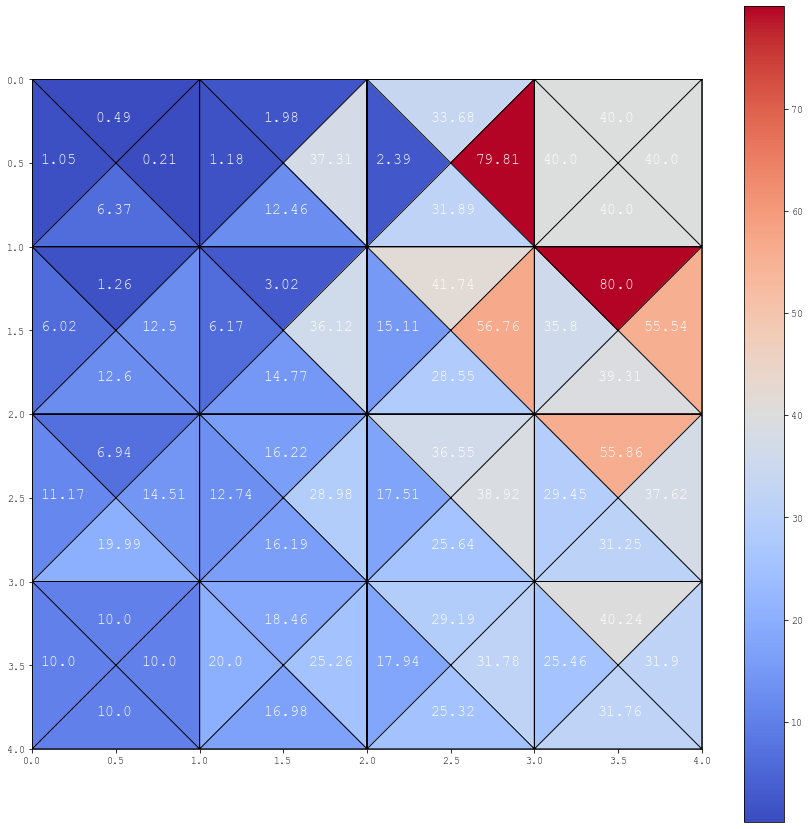

In [31]:
sarsa_1 = sarsa(env=env, discount_factor=1, alpha=0.01)
print(sarsa_1)
plot_q_table(sarsa_1)

In [32]:
policy = optimal_policy(return_max_rewards(sarsa_1))
maze_grid(policy, True)

| →     | →     | ↑     | F     |
| →     | →     | →     | →     |
| →     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



#### Factor 0.9

[[ 5.45615387  7.37496352 10.09540223  5.9539172 ]
 [ 6.30044602 38.33598963 15.3993862   5.89416432]
 [39.45080045 76.00169485 26.94217813  6.99110327]
 [40.         40.         40.         40.        ]
 [ 6.20020988 13.9747736  13.04134368  9.88447625]
 [ 6.8599801  26.93285214 13.46160655  9.9445975 ]
 [37.78900403 42.7916892  18.19821772 13.91284271]
 [76.00000006 42.54200455 23.73597207 27.8945011 ]
 [ 9.60623677 13.37833383 19.0026874  12.80917211]
 [14.2318618  18.10947296 11.15745393 12.67146041]
 [28.80256426 23.21837824 12.95321309 12.77096697]
 [41.57055793 23.34533609 15.85341269 17.57911236]
 [10.         10.         10.         10.        ]
 [12.72283728 12.66874283 10.61500727 19.00000034]
 [17.78301485 15.74029496 12.93396705 10.55411228]
 [23.89550769 15.65765561 15.68463258 12.72882795]]


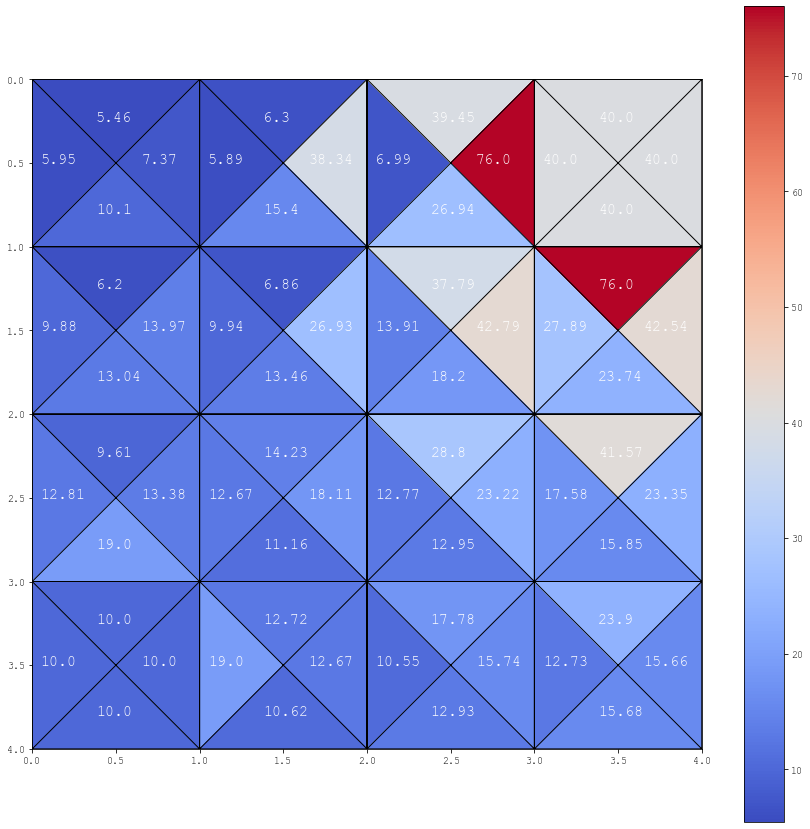

In [33]:
sarsa_2 = sarsa(env=env, discount_factor=0.9, alpha=0.01)
print(sarsa_2)
plot_q_table(sarsa_2)

In [34]:
policy = optimal_policy(return_max_rewards(sarsa_2))
maze_grid(policy, True)

| →     | →     | ↑     | F     |
| →     | →     | →     | →     |
| ←     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



## SARSAMAX, Q-Learning

#### Factor 1

[[14.87388386 23.92996095 47.61482622 15.3717193 ]
 [39.27859457 78.27572807 47.79566884 21.90167689]
 [74.47367026 79.99731674 72.36953273 55.60104826]
 [40.         40.         40.         40.        ]
 [18.14078327 75.53114491 36.14920262 37.85770039]
 [59.47594008 79.78053795 72.98646195 59.50721631]
 [79.87384035 79.9        79.6532718  79.50509928]
 [80.         79.8971224  79.79336184 79.79460257]
 [39.80870397 74.54421611 19.8002612  42.87015751]
 [77.52750331 79.69805775 75.58103041 66.63174739]
 [79.8        79.79959009 79.59901849 79.5790556 ]
 [79.9        79.78781554 79.6752388  79.69089677]
 [10.         10.         10.         10.        ]
 [79.30639685 79.59947365 77.29008168 19.99946203]
 [79.7        79.69999903 79.59999948 77.59871408]
 [79.79999992 79.695641   79.69454937 79.59017703]]


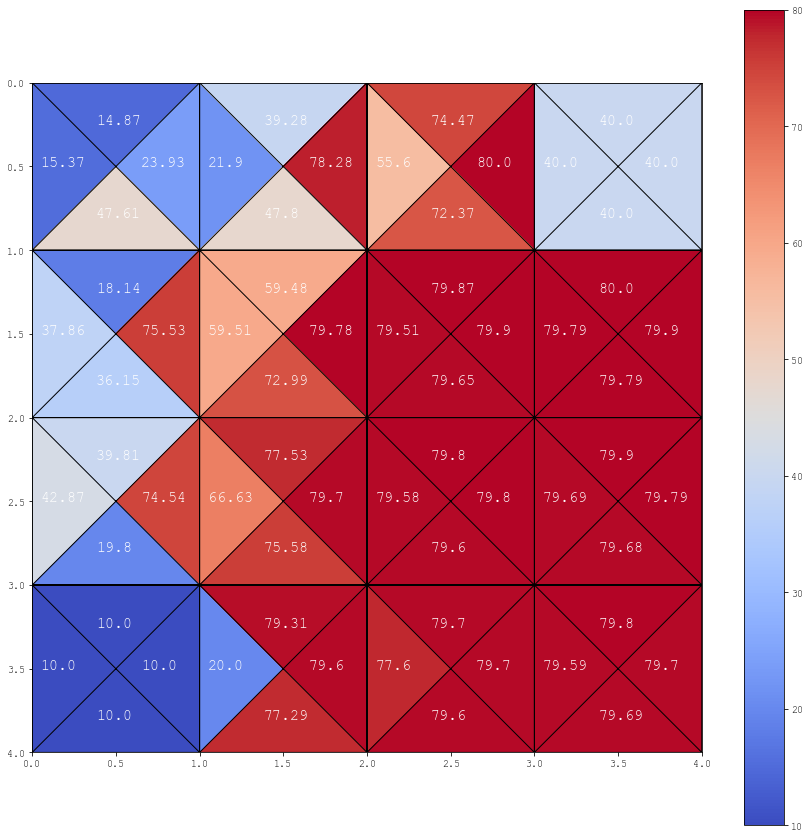

In [35]:
sarsaMAX1 = sarsaMAX(env=env, discount_factor=1, alpha=0.01)
print(sarsaMAX1)
plot_q_table(sarsaMAX1)

In [36]:
policy = optimal_policy(return_max_rewards(sarsaMAX1))
maze_grid(policy, True)

| →     | →     | ←     | F     |
| →     | →     | →     | ↓     |
| ↑     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



#### Factor 0.9

[[27.32925074 35.39753611 71.18936693 26.75484328]
 [56.44146119 79.83070965 67.66324314 44.014555  ]
 [79.28083575 79.99999797 78.64248367 67.57703865]
 [40.         40.         40.         40.        ]
 [45.14698225 79.5614937  61.38254514 67.27498037]
 [68.93763137 79.79999719 79.15259478 77.57783173]
 [79.89997787 79.9        79.69998852 79.69991947]
 [80.         79.89999976 79.79999958 79.79999931]
 [66.8801181  79.33395438 19.93321197 65.6989724 ]
 [79.66547845 79.69999999 77.57956109 78.71693012]
 [79.8        79.8        79.59999999 79.59999976]
 [79.9        79.79999844 79.69999751 79.69999925]
 [10.         10.         10.         10.        ]
 [79.59971463 79.6        77.59965222 19.99999965]
 [79.7        79.7        79.6        77.6       ]
 [79.8        79.69999986 79.69999987 79.59999973]]


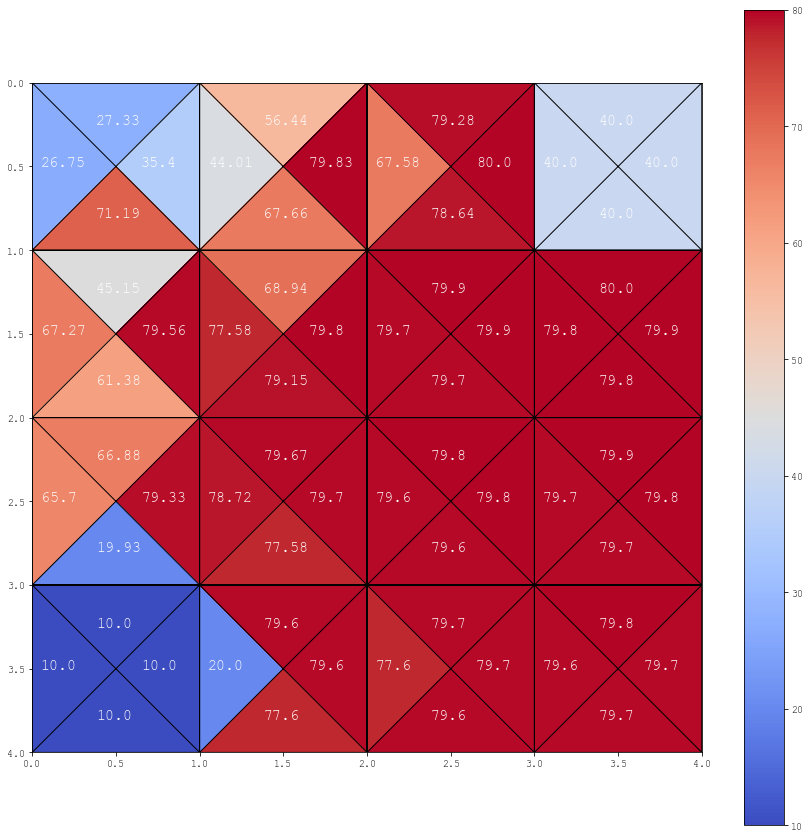

In [37]:
sarsaMAX2 = sarsaMAX(env=env, discount_factor=1, alpha=0.01)
print(sarsaMAX2)
plot_q_table(sarsaMAX2)

In [38]:
policy = optimal_policy(return_max_rewards(sarsaMAX2))
maze_grid(policy, True)

| →     | →     | ←     | F     |
| ↓     | →     | →     | ↓     |
| ↑     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |

